# Homework #5 - Hunter Romano

# The MNIST data set is hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

In [58]:
# package for listing and algebra
import numpy as np

# package for data processing
import pandas as pd

# package for plots
import matplotlib.pyplot as plt
%matplotlib inline

#The following package will be important for analyzing the images
import keras as keras
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation, BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

# package for regression analysis
import statsmodels.api as sm
from math import sqrt
import os

# package for statistics

from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p

# package for more plotting
import seaborn as sns

# import a specific color palette and style guide
color = sns.color_palette()
sns.set_style('darkgrid')

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score

from IPython.display import display, FileLink

# Cool command to get rid of useless warning messages
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [59]:
# import the data set | 
train = pd.read_csv("/Users/hunterromano/Desktop/train.csv")

# look at data to make sure it was imported correctly
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# SECTION # 1 - Use PCA to reduce the dimensionality

In [60]:
label = train.label
# Now I want to actually skim through all the data to understand the data set and what should be removed (if anything)
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
from keras.utils import np_utils

In [62]:
# It looks like the data contains only the pixels of the images except for the column titled "label"
# I will drop that column as it contains no significant information

Y_train = train['label'].values.astype('int32')
Y_train = np_utils.to_categorical(Y_train) 
train.drop(['label'], axis=1, inplace=True)

X_train = (train.values).astype('float32')


In [63]:
# The column "label" has been removed and I understand the basic contents of the set

In [64]:
# Now want to understand how many data points there are
train.shape

(42000, 784)

In [65]:
# So it would appear that there are 42,000 images each containing 784 pixels that I can use to determine the numbers present
# 784 pixels per image means that each image is 28 x 28 pixels

Y_train value form: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Which is 0 (1 in [0] position of the vector).


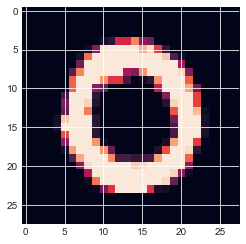

In [66]:
print('Y_train value form: {}'.format(Y_train[1]))
print('Which is 0 (1 in [0] position of the vector).')
plt.imshow(X_train[1].reshape(28,28))
plt.show()

In [67]:
# Before I use PCA to reduce dimensionality of the data I will standardize it using sklearn StandartScaler. 
# I have seen many kernals uise this method to improve their PCA results.

In [68]:
# I imported the Scaler package in my opening code block of packages.
scaler = StandardScaler()
scaler.fit(X_train)
X_sc_train = scaler.transform(X_train)

In [69]:
# Import the package necessary for PCA
from sklearn.decomposition import PCA

Text(0.5,1,'Elbow Method')

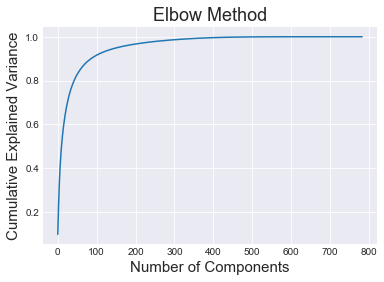

In [70]:
pca = PCA(n_components=784)
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Cumulative Explained Variance', fontsize=15)
plt.title ('Elbow Method', fontsize = 18)

# 
In the plot above the cumulative explained variance is high, near 100. This means most of the necessary data is found in 100 components. I need to look at trade-offs before choosing the number of components used, but 100 seems like a good starting point that contains most of the data.

In [71]:
# I will create a few functions to make redoing the pca with idfferent numbers easier.
NCOMPONENTS = 100

pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_sc_train)
pca_std = np.std(X_pca_train)

# I will print each set to make sure the number of values is correct
print(X_sc_train.shape)
print(X_pca_train.shape)

(42000, 784)
(42000, 100)


In [72]:
# The PCA data looks good as it only contains the 100 components as I wanted.  Now I want to visualize the PCA, and I picked up some nifty code 
# So that I can visualize the PCA next to the one containing all the components.
# To do this I must first inverse the decompososition

In [73]:
inv_pca = pca.inverse_transform(X_pca_train)
inv_sc = scaler.inverse_transform(inv_pca)

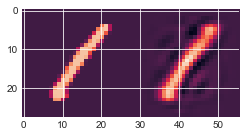

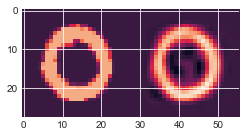

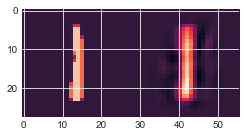

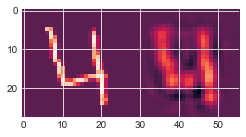

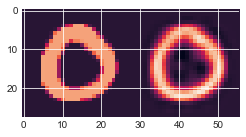

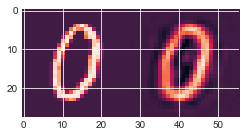

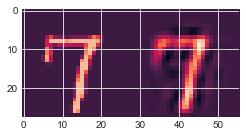

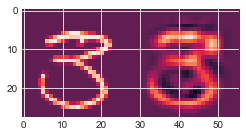

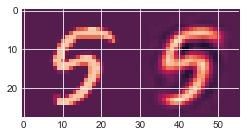

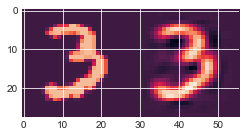

In [74]:
# Now the side by side images should be produced for a human eye analaysis to see the differences on a few samples
def side_by_side(indexes):
    org = X_train[indexes].reshape(28,28)
    rec = inv_sc[indexes].reshape(28,28)
    pair = np.concatenate((org, rec), axis=1)
    plt.figure(figsize=(4,2))
    plt.imshow(pair)
    plt.show()
    
for index in range(0,10):
    side_by_side(index)

The side by side images are after the scaler transformation. The quality has gone down, the you can still decipher the number in each block.

Question 1.A - How many components did you use and why? As I explained earlier, the elbow method helped me determine that 100 was a good number for components and the above images clearly show that with only 100 components the numbers are still visible.


In [75]:
# Now I need to reduce the components all the way to 2 and look at the effect it has on my results.
NCOMPONENTS_2 = 2

pca = PCA(n_components=NCOMPONENTS_2)
X_pca_train_2 = pca.fit_transform(X_sc_train)
pca_std_2 = np.std(X_pca_train_2)

# I will print each set to make sure the number of values is correct
print(X_sc_train.shape)
print(X_pca_train_2.shape)

(42000, 784)
(42000, 2)


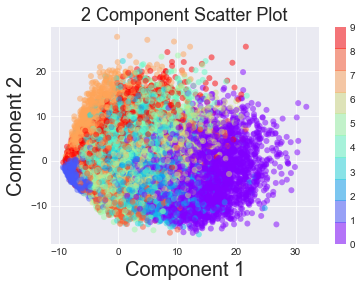

In [76]:
plt.scatter(X_pca_train_2[:, 0], X_pca_train_2[:, 1],
            c=label, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('Component 1', fontsize=20)
plt.ylabel('Component 2', fontsize=20)
plt.title ('2 Component Scatter Plot', fontsize = 18)
plt.colorbar();

1.B - The trends show that certain numbers are grouping together.  The lack of components however is resulting in many of the groupings being placed over one another.  The plot shows us there are some identifiable numbers but it is still difficult to tell what is actually what.

1.C - You would use PCA to reduce dimensionality.  There are better ways to reduce dimensionality that have come out since PCA was the go-to, but PCA remains a very time efficient way.  PCA is reducing the number of components used in order to arrive at the same analysis results in less time.  The main drawbacks of PCA are that PCA assumes that the principle components are a linear combination of the original features. If this is not true, PCA will not give you sensible results, PCA uses variance as the measure of how important a particular dimension is. So, high variance axes are treated as principle components, while low variance axes are treated as noise and it assumes that the principle components are orthogonal.include interpretaion of a dimension reduced analysis, variance becomes a much more important part.  These points were learned from Prasoon Goyal, PhD student in AI at UT Austin via https://www.quora.com/What-are-the-disadvantages-of-a-PCA

# SECTION # 2 - Use T-SNE to plot first two components

In [77]:
# I want to bring in the data again to start fresh as the T-SNE will need to do its own PCA
# import the data set | 
train_tsne = pd.read_csv("/Users/hunterromano/Desktop/train.csv")

# look at data to make sure it was imported correctly
train.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# First I will define my X and Y variables
X = train_tsne.loc[:,"pixel0":"pixel783"]
y = train_tsne.label

In [79]:
# Now I will take a look at the dimmmensions
train_tsne.shape

(42000, 785)

In [80]:
# Now to begin the PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(train_tsne)

In [81]:
# Take a look at the shape of the set after I reduce it
pca.components_.shape

(154, 785)

In [82]:
# Ratio Explained 
pca.explained_variance_ratio_

array([0.0974892 , 0.07160307, 0.0614589 , 0.05379295, 0.04894277,
       0.04303205, 0.03277043, 0.02892097, 0.02766896, 0.02348867,
       0.0209932 , 0.02058999, 0.01702556, 0.01692783, 0.01581125,
       0.01483236, 0.01319689, 0.01282724, 0.01187974, 0.01152754,
       0.01072189, 0.01015197, 0.00964903, 0.00912844, 0.00887639,
       0.00838765, 0.00811856, 0.00777405, 0.00740634, 0.0068666 ,
       0.00657981, 0.00638798, 0.00599366, 0.00588913, 0.00564334,
       0.00540966, 0.00509221, 0.00487504, 0.00475568, 0.00466544,
       0.00452952, 0.00444988, 0.00418255, 0.00397505, 0.00384541,
       0.00374919, 0.00361013, 0.00348521, 0.00336487, 0.00320737,
       0.00315467, 0.00309145, 0.00293708, 0.00286541, 0.00280759,
       0.00269618, 0.00265831, 0.00256298, 0.0025382 , 0.00246178,
       0.00239716, 0.00238739, 0.00227591, 0.00221518, 0.00213933,
       0.00206133, 0.00202851, 0.00195976, 0.00193638, 0.00188485,
       0.00186751, 0.0018167 , 0.00176891, 0.00172592, 0.00166

In [83]:
# I need to import my tsne package
from sklearn.manifold import TSNE

In [84]:
# Define my tsne and begin
tsne = TSNE()
X_tsne = tsne.fit_transform(X_pca[:10000]) 

In [85]:
# Import some more to be able to run the tsne
import matplotlib

In [86]:
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000, learning_rate=200)
x_tsne = tsne.fit_transform(X_pca[:10000])

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.027s...
[t-SNE] Computed neighbors for 10000 samples in 24.559s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 414.180290
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.053436
[t-SNE] KL divergence after 1000 iterations: 1.563021


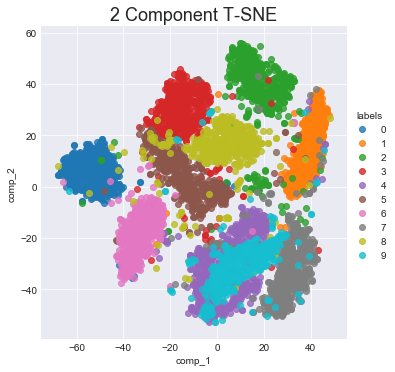

In [87]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(x_tsne)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(5000) ,fit_reg=False)

plt.title ('2 Component T-SNE', fontsize = 18)
plt.show()

2.A - This plot has much better groupings, there is less overlaye between differnt colored points.  The only real difficulty is found in 4 and 9 as there is decent overlap as the numbers are very similar.

In [88]:
# Now I need to look at altering perplexity so I will run my T-SNE with a slightly different code to make that change easier for me
# I will lower the perplexity to 50.
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
x_tsne_lower_perp = tsne.fit_transform(X_pca[:10000])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.027s...
[t-SNE] Computed neighbors for 10000 samples in 22.936s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 383.029433
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.299263
[t-SNE] KL divergence after 1000 iterations: 1.716440


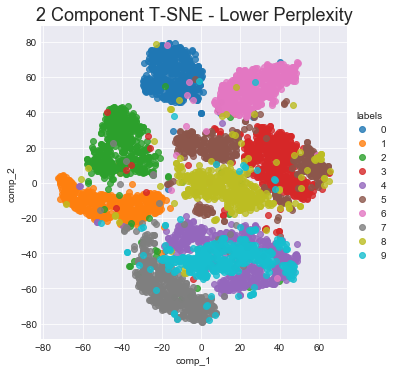

In [89]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(x_tsne_lower_perp)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(5000) ,fit_reg=False)

plt.title ('2 Component T-SNE - Lower Perplexity', fontsize = 18)
plt.show()

2.B - The results seem very similar to when the perplexity was twice as high. The clusters have shifted around the plot, but the same clusters are near eachother and similarly divided.

In [90]:
# Now I need to look at a different learning rate.
# I will lower the learning rate to 100.
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=100)
x_tsne_diff_learning = tsne.fit_transform(X_pca[:10000])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.026s...
[t-SNE] Computed neighbors for 10000 samples in 23.952s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 408.720316
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.195740
[t-SNE] KL divergence after 1000 iterations: 1.745796


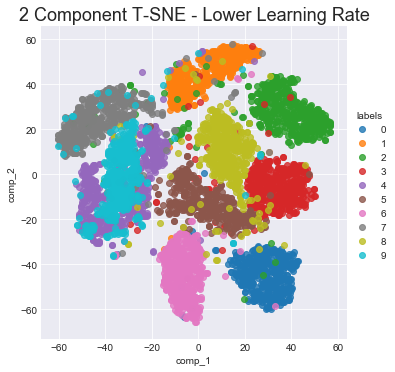

In [91]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(x_tsne_diff_learning)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(5000) ,fit_reg=False)

plt.title ('2 Component T-SNE - Lower Learning Rate', fontsize = 18)
plt.show()

2.C The lower learning rate results in larger jumps during the tsne, these larger jumps mean that the final produced product is simlar once again to the rpevious plots.  It is possible that the contribution level is too high to result in many differences in the plot so I will reduce the number of the pca as well as the learning rate just to check.

In [92]:
# Now I need to look at a different learning rate.
# I will lower the learning rate to 100.
pca = PCA(n_components=80)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=100)
x_tsne_diff_learning_2 = tsne.fit_transform(X_pca[:10000])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.022s...
[t-SNE] Computed neighbors for 10000 samples in 19.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 393.038305
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.027969
[t-SNE] KL divergence after 1000 iterations: 1.749445


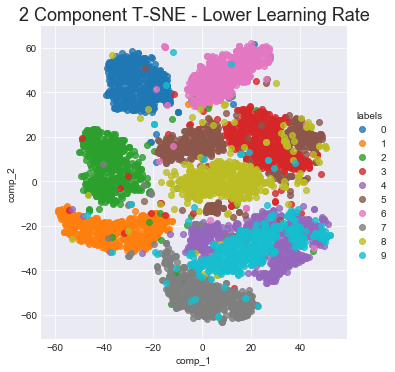

In [93]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(x_tsne_diff_learning_2)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(5000) ,fit_reg=False)

plt.title ('2 Component T-SNE - Lower Learning Rate', fontsize = 18)
plt.show()

Strangely once again very similar.  Let us see how things change when we change iterations.

In [94]:
# I will lower the iteration to 250.
pca = PCA(n_components=80)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=250, learning_rate=100)
x_tsne_it = tsne.fit_transform(X_pca[:10000])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.019s...
[t-SNE] Computed neighbors for 10000 samples in 17.418s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 380.629988
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.068878
[t-SNE] KL divergence after 251 iterations: 1797693134862315708145274237317

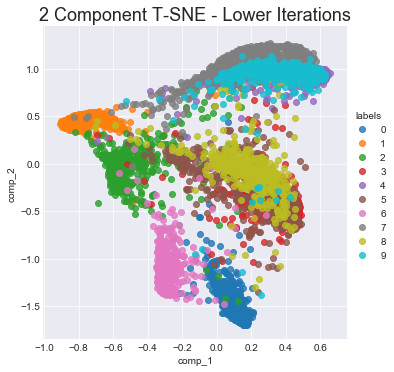

In [95]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(x_tsne_it)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(5000) ,fit_reg=False)

plt.title ('2 Component T-SNE - Lower Iterations', fontsize = 18)
plt.show()

Finally! Something looking off.  The drasticlaly reduced iteration number creates a lot more confusion in the plot with groups still visible but much more cross over in the clusters.

# SECTION # 3 - Perform K-Means Clustering

In [96]:
# Once again I will start by importing the data

# import the data set | 
kdata = pd.read_csv("/Users/hunterromano/Desktop/train.csv")

# look at data to make sure it was imported correctly
kdata.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# Drop label
kdata.drop(['label'], axis=1, inplace=True)

In [98]:
# Make sure I dropped label
X = kdata

X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
# I need to import the right package
from sklearn.cluster import KMeans

# Now I will run the k-means
kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=-1)
kmeans.fit(X)
sk_clusters = kmeans.predict(X)

In [100]:

sk_clusters

array([7, 9, 1, ..., 4, 3, 8], dtype=int32)

The lecture only provides a two variable example between frozen and fresh.  This data set contains many pixels and therefore I am not quite sure how to expand the use case bcause the lecture use was so elementary in nature.

3.A - You choose K by the number of clusters desired, which in our case is 10, digits 0-9.

3.B - How do you evaluate your clustering? Judging by the number of data points in each cluster we can determine how accuarte the cliustering is.


3.C - Visualize your clustering using t-sne

In [101]:
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=1000, learning_rate=200)
x_tsne = tsne.fit_transform(X_pca[:10000])

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.025s...
[t-SNE] Computed neighbors for 10000 samples in 20.425s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 441.932670
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.081161
[t-SNE] KL divergence after 1000 iterations: 1.560986


In [103]:
#matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
#proj = pd.DataFrame(X)
#proj.columns = ["comp_1", "comp_2"]
#proj["labels"] = y
#sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(5000) ,fit_reg=False)

#plt.title ('2 Component T-SNE - Lower Iterations', fontsize = 18)
#plt.show()

3.D - Did you scale your data? - no

# SECTION # 4 - Perform Hierarchical Clustering

In [104]:
# import the data set
hc_data = pd.read_csv("/Users/hunterromano/Desktop/train.csv")

In [105]:
#from scipy.cluster.hierarchy import dendrogram, linkage

#Z = linkage(hc_data, 'complete')
#plt.figure(figsize=(12, 12))
#_ = dendrogram(Z)

I need to get a new computer as mine had difficulty processing the hierarchal code.

# SECTION # 5 - Keras
Almost every kernal or resource I looked at while doing this project did keras.  In fact, while just exploring the data and working on it I did keras before I knew the outline of the project as I thought predicting accuracy would be the project.
I know this wasn't required but I did it before I knew the questions were the primary part of the homework and I worked a lot on it and was proud of it so I thought to include it here on the end regardless.

In [106]:
# import the data set | 
train = pd.read_csv("/Users/hunterromano/Desktop/train.csv")

# look at data to make sure it was imported correctly
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
# Now I want to actually skim through all the data to understand the data set and what should be removed (if anything)
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
# It looks like the data contains only the pixels of the images except for the column titled "label"
# I will drop that column as it contains no significant information
labels = train['label']
train = train.drop(['label'], axis=1)

# I want to check to make sure that "label" has officially been removed
train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
# The column "label" has been removed and I understand the basic contents of the set but now want to understand how many data points there are
train.shape

(42000, 784)

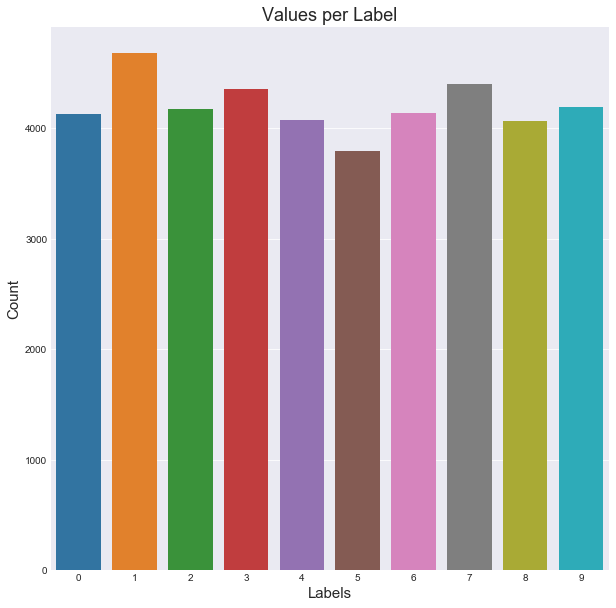

In [110]:
# So it would appear that there are 42,000 images each containing 784 pixels that I can use to determine the numbers present
# 784 pixels per image means that each image is 28 x 28 pixels
# I want to know examine the data by column instead of broadly
sns.countplot(labels)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Labels' , fontsize=15)
plt.title ('Values per Label', fontsize = 18)
plt.show()

In [111]:
# Look at the exact number of values in each category
labels.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [112]:
# The data needs to be reshaped in 28 x 28 images to properly asses its contents and what number is appearing
height = 28
width = 28
canal = 1
train = train.values.reshape(-1,height,width,canal)

In [113]:
# Turn labels into np arrays
labels = labels.values

In [114]:
# Make sure the shape of the data is what we set out to make it
train.shape

(42000, 28, 28, 1)

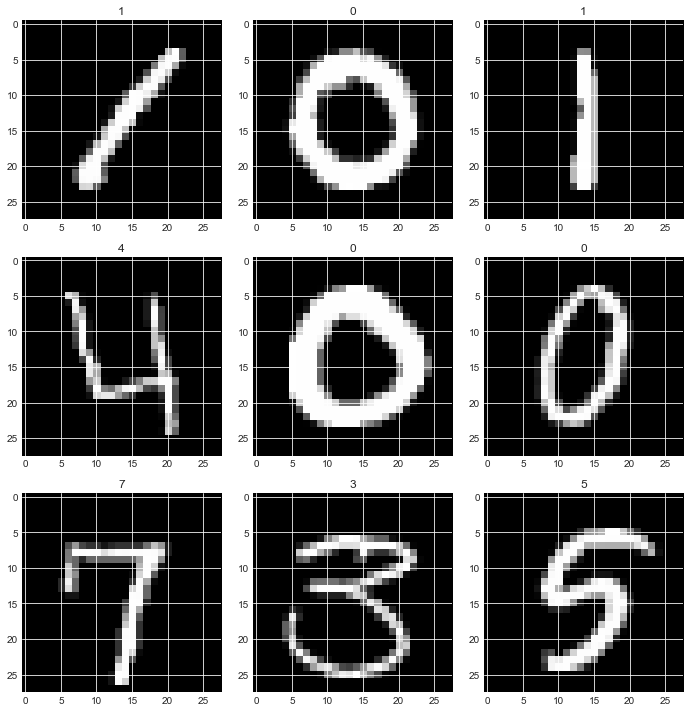

In [115]:
# It looks good now I want to visualize some sampels to make sure it looks correct
# The following code is to visualize some of the records as a images.

for i in range(9):
    plt.subplot(330 + (i+1))
    plt.imshow(train[i][:,:,0], cmap=plt.get_cmap('gray'))
    plt.tight_layout()
    plt.title(labels[i]);

In [116]:
#One-hot encode the labels
labels = pd.get_dummies(labels).values

In [117]:
# Now I want to normalize data
# Normalizing data should improve the model convergence time.
train = train / 255.0

In [118]:
#Split data in train and validation (90% ~ 10%)¶
x_train, x_val, y_train, y_val = train_test_split(train, labels, test_size=0.1, random_state=1)

In [119]:
# Now it is time for Data augmentation
# Data augmentation is used to create more data from the current set we have, here, using the Keras API for data augmentation (ImageDataGenerator), we can generate more samples while feeding the model, the new data is created adding some noise to the real data.
# In this case data augmentation seems to be very useful, as we saw most of the data seems to be the original one but with a bit of distortion.
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.15, # Randomly zoom image 
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15)  # randomly shift images vertically (fraction of total height)

datagen.fit(x_train)

In [120]:
n_classes = 10
learning_rate = 0.001

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5),padding='Same', input_shape=(height, width, canal)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=(5,5),padding='Same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3),padding='Same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3),padding='Same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(n_classes, activation = "softmax"))

optimizer = optimizers.adam(lr=learning_rate)
model.compile(optimizer=optimizer , loss="categorical_crossentropy", metrics=["accuracy"])

In [121]:
#Let's take a look at our model parameters:

EPOCHS = 45
batch = 64

print('Dataset size: %s' % train.shape[0])
print('Epochs: %s' % EPOCHS)
print('Learning rate: %s' % learning_rate)
print('Batch size: %s' % batch)
print('Input dimension: (%s, %s, %s)' % (height, width, canal))

Dataset size: 42000
Epochs: 45
Learning rate: 0.001
Batch size: 64
Input dimension: (28, 28, 1)


In [122]:
x_train[0].shape

(28, 28, 1)

In [123]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size = batch),
                              epochs=EPOCHS, validation_data=(x_val, y_val),
                              verbose=2, steps_per_epoch=x_train.shape[0] // batch)

Epoch 1/45
 - 313s - loss: 0.4343 - acc: 0.8640 - val_loss: 0.0969 - val_acc: 0.9669
Epoch 2/45
 - 275s - loss: 0.1521 - acc: 0.9545 - val_loss: 0.0933 - val_acc: 0.9714
Epoch 3/45
 - 276s - loss: 0.1158 - acc: 0.9651 - val_loss: 0.0660 - val_acc: 0.9793
Epoch 4/45
 - 268s - loss: 0.0963 - acc: 0.9707 - val_loss: 0.0495 - val_acc: 0.9840
Epoch 5/45
 - 321s - loss: 0.0865 - acc: 0.9739 - val_loss: 0.0328 - val_acc: 0.9898
Epoch 6/45
 - 298s - loss: 0.0796 - acc: 0.9758 - val_loss: 0.0347 - val_acc: 0.9893
Epoch 7/45
 - 311s - loss: 0.0730 - acc: 0.9776 - val_loss: 0.0574 - val_acc: 0.9848
Epoch 8/45
 - 321s - loss: 0.0684 - acc: 0.9788 - val_loss: 0.0335 - val_acc: 0.9898
Epoch 9/45
 - 363s - loss: 0.0625 - acc: 0.9809 - val_loss: 0.0302 - val_acc: 0.9905
Epoch 10/45
 - 333s - loss: 0.0629 - acc: 0.9809 - val_loss: 0.0600 - val_acc: 0.9802
Epoch 11/45
 - 307s - loss: 0.0612 - acc: 0.9814 - val_loss: 0.0331 - val_acc: 0.9900
Epoch 12/45
 - 335s - loss: 0.0576 - acc: 0.9819 - val_loss: 0.

KeyboardInterrupt: 

In [ ]:
# I ran out of time

# A good way to evaluate a classification model is to take a look at the model confusion matrix, this way we can have a better insight on what our model is getting right and what not.

cnf_matrix = confusion_matrix(np.argmax(y_val, axis=1), model.predict_classes(x_val))
plot_confusion_matrix(cnf_matrix, range(10))

I ran out of run time because of some last minute edits.  If you want I cna run it again overnight and send it again in the morning.  I actually got some relaly great reuslts, but I know the predictor isn't the focus of the assignment like I thought it was. Thanks!